# corrLib.py document

* corrLib collects all the functions that are used in quantifying correlation length and density fluctuation

### corrS(X, Y, U, V)
X, Y, U, V represent a vector field. Return value CA, CV are matrices representing spatial angle and velocity correlation distribution of given vector field.

In [6]:
from corrLib import corrS, corrI, divide_windows, distance_corr, corrIseq, \
                    readseq, boxsize_effect_spatial, density_fluctuation
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(0, 50)
Y = np.linspace(0, 50)
X, Y = np.meshgrid(X, Y)
U = np.random.random(size=X.shape)
V = np.random.random(size=X.shape)
CA, CV = corrS(X, Y, U, V)

### corrI(X, Y, I)
X, Y, I represents the intensity field of an image. Returns the intensity correlation distribution of given intensity field.

In [5]:
I = np.random.random(size=X.shape)
CI = corrI(X, Y, I)

### divide_windows(img, windowsize=[20, 20], step=10)
Divides an image into small boxes with given step length (overlap is allowed).
* img: a 2D array 
* windowsize: \[horizontal, vertical\] dimensions of the boxes to be divided, in unit of pixel
* step: interval between adjacent boxes, in unit of pixel

In [11]:
img = np.random.random(size=(500, 500))
X, Y, I = divide_windows(img, windowsize=[100, 100], step=100)
print('img size: ' + str(img.shape) + '\ndivided image I size: ' + str(I.shape))

img size: (500, 500)
divided image I size: (4, 4)


### distance_corr(X, Y, C)
X, Y, C represent a directional correlation distribution. Returns a scalar correlation distribution (as a pandas.DataFrame).
* Column R: distance
* Column C: correlation

In [14]:
CI = corrI(X, Y, I)
dc = distance_corr(X, Y, CI)
dc.head()

,R,C
0,0.000000,1.000000
1,100.000000,0.128203
4,100.000000,-0.320452
5,141.421356,-0.439222
2,200.000000,0.113122


### corrIseq(folder, **kwargs)
Calculates the spatial intensity correlation distribution for an image sequence (a series of _\*.tif_ images) in a given _folder_. Returns a pandas.DataFrame containing X, Y, I, Correlation, distance and frame number \[X, Y, I, C, R, frame\].

#### \*\*kwargs:
* windowsize: \[horizontal, vertical\] dimensions of the boxes to be divided, passed to function divide_windows(img)
* step: interval between adjacent boxes, passed to function divide_windows(img)

In [25]:
data_seq = corrIseq(folder)
data_seq.head()

,X,Y,I,C,R,frame
0,0.0,0.0,525.5944,1.000000,0.0,0
1,100.0,0.0,527.5859,0.950538,100.0,0
2,200.0,0.0,526.7618,0.900444,200.0,0
3,300.0,0.0,524.3661,0.846798,300.0,0
4,400.0,0.0,528.0216,0.783501,400.0,0


### readseq(folder)
Read image sequence in given folder and sort the sequence by name. Return a pandas.DataFrame containing (file name, full directory).

In [17]:
folder = r'I:\Google Drive\Research projects\DF\nolight-light'
l = readseq(folder)
l.head()

,Name,Dir
0,0000,I:\Google Drive\Research projects\DF\nolight-l...
1,0001,I:\Google Drive\Research projects\DF\nolight-l...
2,0002,I:\Google Drive\Research projects\DF\nolight-l...
3,0003,I:\Google Drive\Research projects\DF\nolight-l...
4,0004,I:\Google Drive\Research projects\DF\nolight-l...


### data = boxsize_effect_spatial(img, boxsize, mpp)
* img: the image to be tested, array-like
* boxsize: a list of boxsize to be tested, list-like
* mpp: microns per pixel, float

<IPython.core.display.Javascript object>


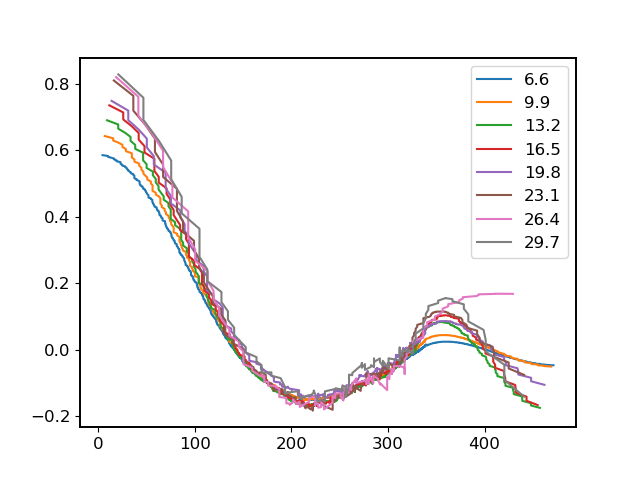

In [4]:
%matplotlib nbagg
img = io.imread(r'I:\Github\Python\Correlation\test_images\boxsize_effect\0001.tif')
boxsize = range(20, 100, 10)
mpp= 0.33
data = boxsize_effect_spatial(img, boxsize, mpp)

### density_fluctuation(img8)
Calculate density (intensity) fluctuation of an 8-bit grayscale image. 
* img8: 8-bit grayscale image
* return: a pandas.DataFrame object with columns "n" and "d" representing average box density and standard deviation of box density (\Delta N)

In [4]:
img8 = io.imread(r'I:\Github\Python\Correlation\test_images\boxsize_effect\0001.tif')
df = density_fluctuation(img8)
df.head()

,n,d
0,1.0,0.042717
1,4.0,0.159092
2,9.0,0.334780
3,16.0,0.566492
4,25.0,0.854737


Text(0, 0.5, '$\\Delta N$ ')

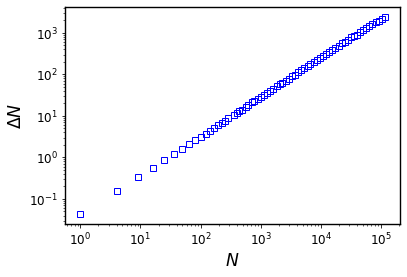

In [7]:
plt.plot(df.n, df.d, marker='s', ls='', mfc=(0,0,0,0), mec='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$N$')
plt.ylabel('$\Delta N$ ')